In [1]:
from graph_tool.all import *

In [2]:
#Create topology to hold graph
top = Graph(directed=True)
top.vertex_properties['label'] = top.new_vertex_property("string","")
top.vertex_properties['pdg'] = top.new_vertex_property("int")
#Create Initial production vertex:
blob = top.add_vertex()
top.vp.label[blob] = 'v0'
top.vp.pdg[blob] = 0

In [3]:
#Create initial states
#and its links to the initial production vertex:
momA = top.add_vertex()
momB = top.add_vertex()
top.vp.label[momA] =  '~c1+'
top.vp.pdg[momA] =  1000024
e = top.add_edge(blob,momA)
top.vp.label[momB] =  '~n20'
top.vp.pdg[momB] =  1000023
e = top.add_edge(blob,momB)

In [4]:
#Create First-Level Daugther particles
#and create Links between mother and daughters:
dA1 = top.add_vertex()
top.vp.label[dA1] = '~n1_0'
top.vp.pdg[dA1] =  1000022
eA1 = top.add_edge(momA, dA1)
dA2 = top.add_vertex()
top.vp.label[dA2] = 'W+'
top.vp.pdg[dA2] = 24
eA2 = top.add_edge(momA, dA2)
dB1 = top.add_vertex()
top.vp.label[dB1] = '~n1_0'
top.vp.pdg[dB1] =  1000022
eB1 = top.add_edge(momB, dB1)
dB2 = top.add_vertex()
top.vp.label[dB2] = 'h'
top.vp.pdg[dB2] =  25
eB2 = top.add_edge(momB, dB2)

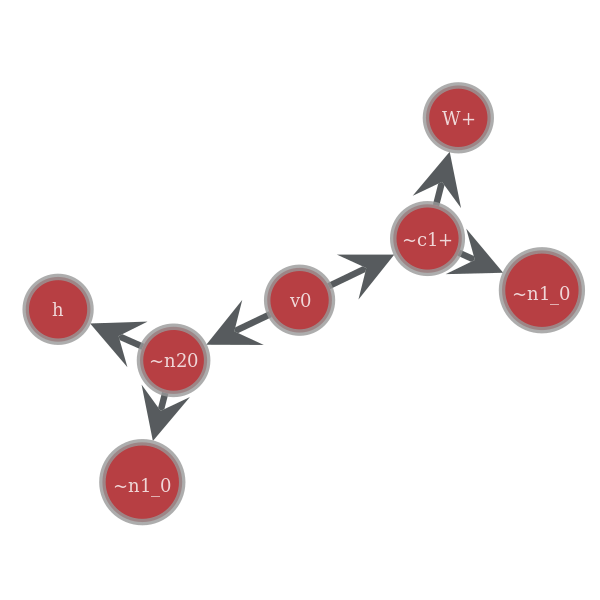

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5d69b88358, at 0x7f5d69b88240>

In [5]:
graph_draw(top, vertex_text=top.vp.label, vertex_font_size=18, inline=True)

In [7]:
#Get number of outgoing particles of each mom:
print(momA.out_degree(),momB.out_degree())

2 2


In [17]:
#Print the number of mothers of each particle:
allP = [momA,momB,dA1,dA2,dB1,dB2]
for p in allP:    
    print(p,p.in_degree(),p.out_degree())
    if not p.out_degree():
        print(top.vp.label[p],'is stable')

1 1 2
2 1 2
3 1 0
~n1_0 is stable
4 1 0
W+ is stable
5 1 0
~n1_0 is stable
6 1 0
h is stable


In [9]:
#Moving through a graph:
def print_daugthers(v,indent=''):
    if not v.out_degree():
        print(indent,top.vp.label[v],'(stable)')
    else:
        print(indent,top.vp.label[v],'\n '+indent+'daughters:')
        for daughter in v.out_neighbours():
            print_daugthers(daughter,indent = indent + '    ')

In [10]:
print_daugthers(top.vertex(0))

 v0 
 daughters:
     ~c1+ 
     daughters:
         ~n1_0 (stable)
         W+ (stable)
     ~n20 
     daughters:
         ~n1_0 (stable)
         h (stable)


In [15]:
#Using a depth-first search method (go down each branch till you reach the stable particle):
#(Vertical search)
ident = ''
mom_up = 0
print("Depth-first:")
for mom,daughter in dfs_iterator(top,top.vertex(0)):
    if mom != mom_up:
        mom_up = mom
        ident += '\t'
    if mom == 0: ident = ''
    if not daughter.out_degree():
        print(ident,top.vp.label[mom],'--->',top.vp.label[daughter],'(stable)')
    else:
        print(ident,top.vp.label[mom],'--->',top.vp.label[daughter])
#Using the breath-first search method (move laterally):
print("Breath-first:")
for mom,daughter in bfs_iterator(top,top.vertex(0)):
    if not daughter.out_degree():
        print(top.vp.label[mom],'--->',top.vp.label[daughter],'(stable)')
    else:
        print(top.vp.label[mom],'--->',top.vp.label[daughter])

Depth-first:
 v0 ---> ~c1+
	 ~c1+ ---> ~n1_0 (stable)
	 ~c1+ ---> W+ (stable)
 v0 ---> ~n20
	 ~n20 ---> ~n1_0 (stable)
	 ~n20 ---> h (stable)
Breath-first:
v0 ---> ~c1+
v0 ---> ~n20
~c1+ ---> ~n1_0 (stable)
~c1+ ---> W+ (stable)
~n20 ---> ~n1_0 (stable)
~n20 ---> h (stable)


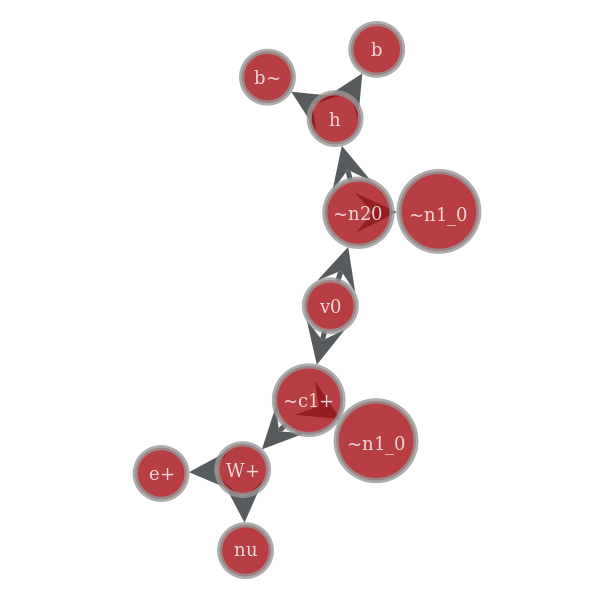

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5d98b23eb8, at 0x7f5d98b25160>

In [18]:
#Create a similar topology but with distinct ordering
topB = Graph(directed=True)
topB.vertex_properties['label'] = topB.new_vertex_property("string","")
topB.vertex_properties['pdg'] = topB.new_vertex_property("int")
#Create Initial production vertex:
blob = topB.add_vertex()
topB.vp.label[blob] = 'v0'
topB.vp.pdg[blob] = 0

#Create initial states
#and its links to the initial production vertex:
momB = topB.add_vertex()
momA = topB.add_vertex()
topB.vp.label[momA] =  '~c1+'
topB.vp.pdg[momA] = 1000024
topB.add_edge(blob,momA)
topB.vp.label[momB] =  '~n20'
topB.vp.pdg[momB] = 1000023
topB.add_edge(blob,momB)

#Create First-Level Daugther particles
#and create Links between mother and daughters:
dA1 = topB.add_vertex()
topB.vp.label[dA1] = 'W+'
topB.vp.pdg[dA1] = 24
eA1 = topB.add_edge(momA, dA1)
dA2 = topB.add_vertex()
topB.vp.label[dA2] = '~n1_0'
topB.vp.pdg[dA2] = 1000022
eA2 = topB.add_edge(momA, dA2)
dB1 = topB.add_vertex()
topB.vp.label[dB1] = '~n1_0'
topB.vp.pdg[dB1] = 1000022
eB1 = topB.add_edge(momB, dB1)
dB2 = topB.add_vertex()
topB.vp.label[dB2] = 'h'
topB.vp.pdg[dB2] = 25
eB2 = topB.add_edge(momB, dB2)

#Create Second-Level Daugther particles
#and create Links between mother and daughters:
dA21 = topB.add_vertex()
topB.vp.label[dA21] = 'nu'
topB.vp.pdg[dA21] = 12
e = topB.add_edge(dA1, dA21)
dA22 = topB.add_vertex()
topB.vp.label[dA22] = 'e+'
topB.vp.pdg[dA22] = -11
e = topB.add_edge(dA1, dA22)
dB21 = topB.add_vertex()
topB.vp.label[dB21] = 'b~'
topB.vp.pdg[dB21] = -5
e = topB.add_edge(dB2, dB21)
dB22 = topB.add_vertex()
topB.vp.label[dB22] = 'b'
topB.vp.pdg[dB22] = 5
e = topB.add_edge(dB2, dB22)

graph_draw(topB, vertex_text=topB.vp.label, vertex_font_size=18, inline=True)

In [19]:
#Check overall shape isomorphism
print(isomorphism(top,topB))
#Check isomorphism including particle PDGs:
print(isomorphism(top,topB,vertex_inv1=top.vp.pdg,vertex_inv2=topB.vp.pdg))

False
False


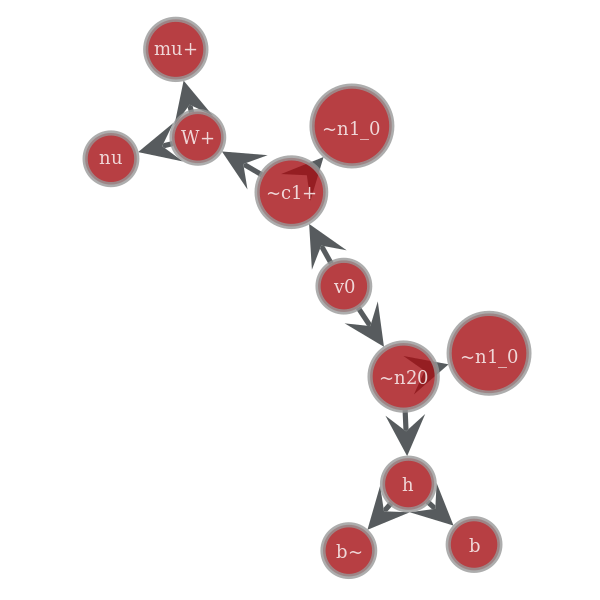

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5d701b1940, at 0x7f5d701b1f98>

In [20]:
topC = Graph(topB)
topC.vp.label[topC.vertex(8)] = 'mu+'
topC.vp.pdg[topC.vertex(8)] = -13
graph_draw(topC, vertex_text=topC.vp.label, vertex_font_size=18, inline=True)

In [21]:
#Check overall shape isomorphism
print(isomorphism(topB,topC))
#Check isomorphism including particle PDGs:
print(isomorphism(topB,topC,vertex_inv1=topB.vp.pdg,vertex_inv2=topC.vp.pdg))

True
False


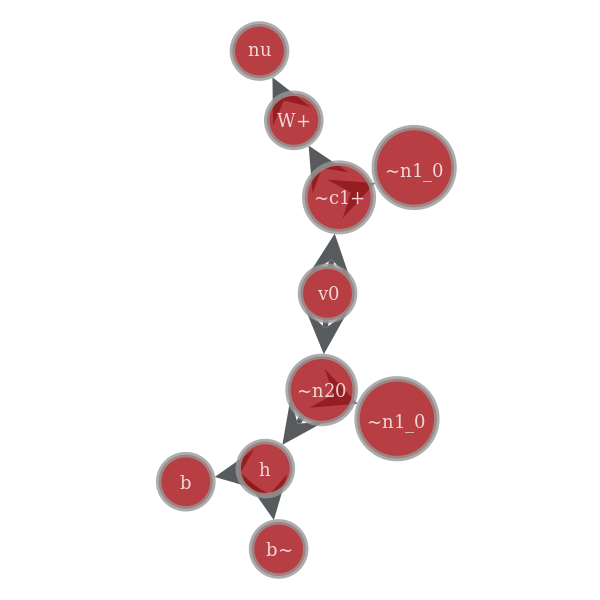

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5d701b15f8, at 0x7f5d98b233c8>

In [22]:
topD = Graph(topB)
for e in topD.vertex(8).in_edges():
    topD.remove_edge(e)
topD.remove_vertex(8)
graph_draw(topD, vertex_text=topD.vp.label, vertex_font_size=18, inline=True)

In [23]:
#Check overall shape isomorphism
print(isomorphism(topB,topD))
#Check isomorphism including particle PDGs:
print(isomorphism(topB,topD,vertex_inv1=topB.vp.pdg,vertex_inv2=topD.vp.pdg))

False
False


In [24]:
#Get isomorphism mapping between two isomorphic graphs:
is_isomorphic,isomap = isomorphism(top,topB,vertex_inv1=top.vp.pdg,vertex_inv2=topB.vp.pdg,isomap=True)
for v in top.vertices():
    print(v,'=',isomap[v],'(',top.vp.label[v],'=',topB.vp.label[isomap[v]],')')

0 = 0 ( v0 = v0 )
1 = 0 ( ~c1+ = v0 )
2 = 0 ( ~n20 = v0 )
3 = 0 ( ~n1_0 = v0 )
4 = 0 ( W+ = v0 )
5 = 0 ( ~n1_0 = v0 )
6 = 0 ( h = v0 )


In [26]:
print(top.__dict__)

{'_Graph__properties': {('v', 'label'): <PropertyMap object with key type 'Vertex' and value type 'string', for Graph 0x7f5d69b88358, at 0x7f5d69b88320>, ('v', 'pdg'): <PropertyMap object with key type 'Vertex' and value type 'int32_t', for Graph 0x7f5d69b88358, at 0x7f5d69b88550>}, '_Graph__graph_properties': {}, '_Graph__vertex_properties': {'label': <PropertyMap object with key type 'Vertex' and value type 'string', for Graph 0x7f5d69b88358, at 0x7f5d69b88320>, 'pdg': <PropertyMap object with key type 'Vertex' and value type 'int32_t', for Graph 0x7f5d69b88358, at 0x7f5d69b88550>}, '_Graph__edge_properties': {}, '_Graph__known_properties': {140039182386288: <weakref at 0x7f5d69b7ba98; to 'PropertyMap' at 0x7f5d69b88470>, 140039182386344: <weakref at 0x7f5d69b7bb38; to 'PropertyMap' at 0x7f5d69b884a8>, 140039182385952: <weakref at 0x7f5d69b7bb88; to 'PropertyMap' at 0x7f5d69b88320>, 140039182386512: <weakref at 0x7f5d69b7bc28; to 'PropertyMap' at 0x7f5d69b88550>, 140039182385728: <we